## Binary RB Example

In [ ]:
from selene_sim import DepolarizingErrorModel, Stim

from solarium.benchmarks import BinaryRB_Experiment

In [4]:
# select parameters and build experiment

n_qubits = 98
seq_lengths = [4, 8, 12]
seq_reps = 4
n_meas_per_layer = [0, 8, 16]
filename = 'exp_binary_RB_example.p'

exp = BinaryRB_Experiment(n_qubits, seq_lengths, seq_reps,
                          n_meas_per_layer=n_meas_per_layer,
                         filename=filename)

#exp.options['measure_leaked'] = True # False by default.

exp.add_settings()

In [ ]:
# or load an existing experiment from working directory

filename = 'exp_BinaryRB_example.p'
exp = BinaryRB_Experiment.load(filename)

Having setup our binary RB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [ ]:
# setup simple error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    #p_1q=3e-5,
    #p_1q=1e-3,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=1.5e-3,
    p_init=0,
)

In [8]:
# simulate experiment

shots = 10
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/36 circuits complete
2/36 circuits complete
3/36 circuits complete
4/36 circuits complete
5/36 circuits complete
6/36 circuits complete
7/36 circuits complete
8/36 circuits complete
9/36 circuits complete
10/36 circuits complete
11/36 circuits complete
12/36 circuits complete
13/36 circuits complete
14/36 circuits complete
15/36 circuits complete
16/36 circuits complete
17/36 circuits complete
18/36 circuits complete
19/36 circuits complete
20/36 circuits complete
21/36 circuits complete
22/36 circuits complete
23/36 circuits complete
24/36 circuits complete
25/36 circuits complete
26/36 circuits complete
27/36 circuits complete
28/36 circuits complete
29/36 circuits complete
30/36 circuits complete
31/36 circuits complete
32/36 circuits complete
33/36 circuits complete
34/36 circuits complete
35/36 circuits complete
36/36 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [3]:
# Choose domain and login to Nexus

import qnexus

### uncomment lines below if submitting to QA ###
#from qnexus.config import CONFIG
#CONFIG.domain = "qa.myqos.com"

qnexus.login_with_credentials()

Enter your Nexus email:  karl.mayer@quantinuum.com
Enter your Nexus password:  ········


✅ Successfully logged in as karl.mayer@quantinuum.com.


In [4]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='binary_RB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [5]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

Experiment saved! exp_binary_RB_example.py


In [8]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<JobStatusEnum.COMPLETED: 'COMPLETED'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 8, 28, 18, 44, 55, 1876, tzinfo=datetime.timezone.utc), queued_time=None, submitted_time=datetime.datetime(2025, 8, 28, 18, 37, 4, 343931, tzinfo=datetime.timezone.utc), running_time=None, cancelled_time=None, error_time=None, queue_position=None)

In [ ]:
# retrieve results

exp.retrieve(execute_job_ref)

### Analyze experiment results

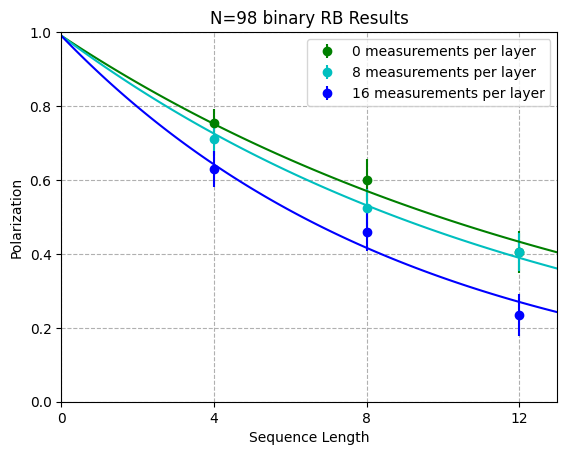

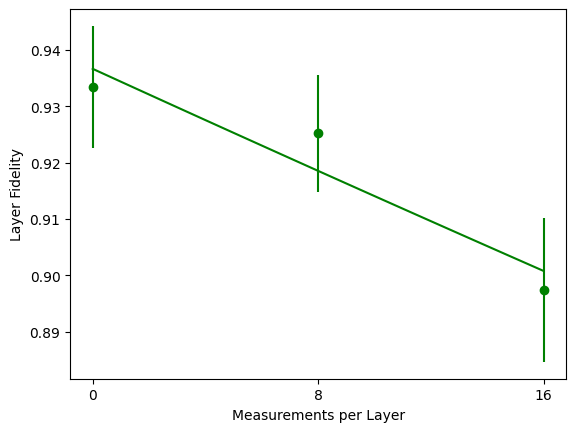

Max depth with success > 2/3
MCMR/layer = 0: 26
MCMR/layer = 8: 23
MCMR/layer = 16: 17

Effective TQ avg infidelity: 0.00108 +/- 0.00018
Effective MCMR error: 0.00162 +/- 0.00048


In [6]:
exp.analyze_results(xlim=(0,13), ylim=(0,1))

In [55]:
# save experiment object to working directory

exp.save()